In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv('nasa.csv')
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
df = data.copy()
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [5]:
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [6]:
df.select_dtypes('object').value_counts()

Close Approach Date  Orbiting Body  Orbit Determination Date  Equinox
2013-10-22           Earth          2017-04-06 08:43:56       J2000      3
2015-01-15           Earth          2017-04-06 08:36:08       J2000      3
2014-09-22           Earth          2017-04-06 08:38:41       J2000      2
2012-01-15           Earth          2017-04-06 08:51:18       J2000      2
2011-03-08           Earth          2017-04-06 08:54:11       J2000      2
                                                                        ..
2004-04-08           Earth          2017-04-06 08:34:21       J2000      1
                                    2017-04-06 08:29:39       J2000      1
                                    2017-04-06 08:27:54       J2000      1
                                    2016-10-21 06:47:16       J2000      1
2016-09-08           Earth          2017-08-10 06:20:10       J2000      1
Name: count, Length: 4652, dtype: int64

In [7]:
df.select_dtypes('float', 'int').value_counts()

Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  Est Dia in Feet(max)  Relative Velocity km per sec  Relative Velocity km per hr  Miles per hour  Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  Miss Dist.(miles)  Minimum Orbit Intersection  Jupiter Tisserand Invariant  Epoch Osculation  Eccentricity  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion
11.16               15.579552           34.836938           15579.552413       34836.938254       9.680682               21.646663              51114.018738          114294.420501         4.412295                      15884.262555                 9869.863031     0.365567                  142.205673         5.468808e+07            3.398160e+07       0.150505                    4.583               

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [9]:
df.shape

(4687, 40)

In [10]:
#description de la base de données

In [11]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [13]:
#drop the columns(Neo Reference ID, Name)

df = df.drop(['Neo Reference ID', 'Name'], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [14]:
df.shape

(4687, 38)

In [15]:
df['Hazardous'].unique()

array([ True, False])

# one hot encoding of hazardous column

In [16]:
hazardous_label = pd.get_dummies(df['Hazardous'])
hazardous_label

df = pd.concat([df, hazardous_label], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,...,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,...,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True,False,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,...,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False,True,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,...,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True,False,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,...,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False,True,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,...,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True,False,True


In [17]:
#drop the columns hazzardous
df = df.drop('Hazardous', axis = 1)
df.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Close Approach Date           4687 non-null   object 
 10  Epoch Date Close Approach     4687 non-null   int64  
 11  Relative Velocity km per sec  4687 non-null   float64
 12  Relative Velocity km per hr   4687 non-null   float64
 13  Mil

In [19]:
df['Equinox'].value_counts()

Equinox
J2000    4687
Name: count, dtype: int64

In [20]:
df['Orbiting Body'].value_counts()

Orbiting Body
Earth    4687
Name: count, dtype: int64

In [21]:
df['Orbit Determination Date'].value_counts()

Orbit Determination Date
2017-06-21 06:17:20    9
2017-04-06 09:24:24    8
2017-04-06 08:57:13    8
2017-05-03 06:18:20    7
2017-04-06 08:26:19    7
                      ..
2017-04-06 09:22:43    1
2017-04-06 09:09:56    1
2017-04-06 09:10:02    1
2017-04-06 08:22:38    1
2017-04-29 06:18:33    1
Name: count, Length: 2680, dtype: int64

In [22]:
#We can drop the columns (Orbiting body et equinox qui nous servira pas )
df = df.drop(['Orbiting Body', 'Equinox'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in KM(min)            4687 non-null   float64
 2   Est Dia in KM(max)            4687 non-null   float64
 3   Est Dia in M(min)             4687 non-null   float64
 4   Est Dia in M(max)             4687 non-null   float64
 5   Est Dia in Miles(min)         4687 non-null   float64
 6   Est Dia in Miles(max)         4687 non-null   float64
 7   Est Dia in Feet(min)          4687 non-null   float64
 8   Est Dia in Feet(max)          4687 non-null   float64
 9   Close Approach Date           4687 non-null   object 
 10  Epoch Date Close Approach     4687 non-null   int64  
 11  Relative Velocity km per sec  4687 non-null   float64
 12  Relative Velocity km per hr   4687 non-null   float64
 13  Mil

In [23]:
df.shape

(4687, 37)

# rélation de corrélation lineaire

In [28]:
df = df.drop(['Orbit Determination Date','Close Approach Date','Epoch Date Close Approach'], axis=1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,False,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,True,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,False,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,True,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,False,True


<AxesSubplot:>

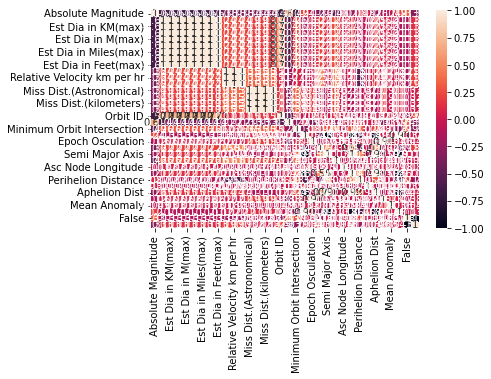

In [29]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True)

In [30]:
df = df.drop('Orbit ID', axis=1)
df

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,False,True
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,False,True
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,True,False
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,False,True
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,True,False
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,22.154265,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,True,False
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,3.225150,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,True,False
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,7.191642,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,True,False
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,11.352090,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,True,False


<AxesSubplot:>

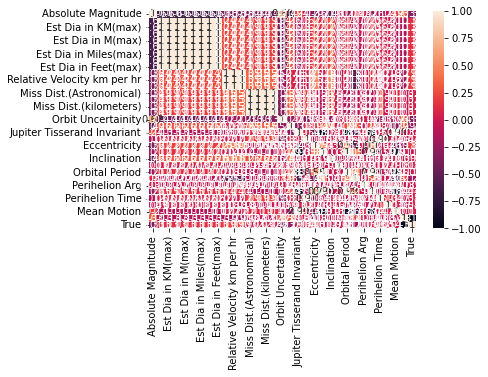

In [31]:
sns.heatmap(df.corr(), annot=True)

# Identifying the missing values in the datasets

In [33]:
missing_values = df.isnull().sum()
missing_values_percent = (missing_values/len(df))*100

data = pd.concat([missing_values, missing_values_percent], axis =1)
data.columns = ['valeurs manquantes', 'pourcentage des valeurs manquantes']
data

,valeurs manquantes,pourcentage des valeurs manquantes
Absolute Magnitude,0,0.0
Est Dia in KM(min),0,0.0
Est Dia in KM(max),0,0.0
Est Dia in M(min),0,0.0
Est Dia in M(max),0,0.0
Est Dia in Miles(min),0,0.0
Est Dia in Miles(max),0,0.0
Est Dia in Feet(min),0,0.0
Est Dia in Feet(max),0,0.0
Relative Velocity km per sec,0,0.0


In [34]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4682    False
4683    False
4684    False
4685    False
4686    False
Length: 4687, dtype: bool

In [35]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,False,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,True,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,False,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,True,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,False,True


In [36]:
vars_keep = ['Absolute Magnitude', 'Relative Velocity km per sec','Relative Velocity km per hr'
,'Miles per hour','Orbit Uncertainity', 'Minimum Orbit Intersection','Jupiter Tisserand Invariant', 
'Epoch Osculation', 
'Eccentricity', 
'Semi Major Axis',
'Inclination',
'Asc Node Longitude',
'Orbital Period',
'Perihelion Distance', 
'Perihelion Arg',
'Aphelion Dist', 
'Perihelion Time',
'Mean Anomaly', 
'Mean Motion']

df_restrict =df[vars_keep]
df_restrict.head(10)

,Absolute Magnitude,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,21.6,6.115834,22017.003799,13680.509944,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,21.3,18.113985,65210.346095,40519.173105,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,20.3,7.590711,27326.560182,16979.661798,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,27.4,11.173874,40225.948191,24994.839864,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,21.6,9.840831,35426.991794,22012.954985,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395
5,19.6,10.808844,38911.838251,24178.303051,1,0.272213,4.724,2458000.5,0.563441,1.323532,17.927751,178.971951,556.160556,0.577800,198.145969,2.069265,2.458009e+06,354.237368,0.647295
6,19.6,10.808842,38911.829716,24178.297748,1,0.272213,4.724,2458000.5,0.563441,1.323532,17.927748,178.971953,556.160544,0.577800,198.145960,2.069265,2.458009e+06,354.237396,0.647295
7,19.2,24.421884,87918.782382,54629.312308,0,0.098758,4.921,2458000.5,0.449763,1.237475,34.695127,112.562984,502.808758,0.680905,288.374651,1.794045,2.458242e+06,186.776932,0.715978
8,17.8,17.373784,62545.621813,38863.417065,0,0.109354,5.386,2458000.5,0.238179,1.145551,22.215210,80.211132,447.837013,0.872705,353.422394,1.418397,2.458222e+06,182.236432,0.803864
9,21.5,12.899610,46438.594999,28855.136987,0,0.016907,6.623,2458000.5,0.551389,0.876125,2.059577,2.613682,299.535161,0.393040,253.765937,1.359211,2.457901e+06,119.861382,1.201862


In [37]:
df_miss = df_restrict.fillna(0)
df_miss.head(5)

,Absolute Magnitude,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,21.6,6.115834,22017.003799,13680.509944,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,21.3,18.113985,65210.346095,40519.173105,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,20.3,7.590711,27326.560182,16979.661798,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,27.4,11.173874,40225.948191,24994.839864,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,21.6,9.840831,35426.991794,22012.954985,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395


In [38]:
df_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Relative Velocity km per sec  4687 non-null   float64
 2   Relative Velocity km per hr   4687 non-null   float64
 3   Miles per hour                4687 non-null   float64
 4   Orbit Uncertainity            4687 non-null   int64  
 5   Minimum Orbit Intersection    4687 non-null   float64
 6   Jupiter Tisserand Invariant   4687 non-null   float64
 7   Epoch Osculation              4687 non-null   float64
 8   Eccentricity                  4687 non-null   float64
 9   Semi Major Axis               4687 non-null   float64
 10  Inclination                   4687 non-null   float64
 11  Asc Node Longitude            4687 non-null   float64
 12  Orbital Period                4687 non-null   float64
 13  Per

Absolute Magnitude


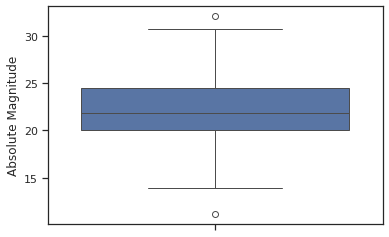

Est Dia in KM(min)


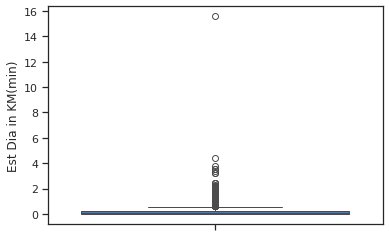

Est Dia in KM(max)


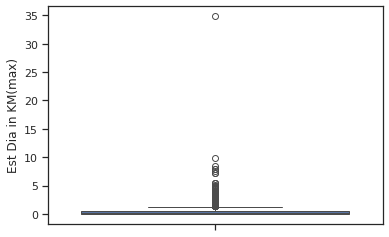

Est Dia in M(min)


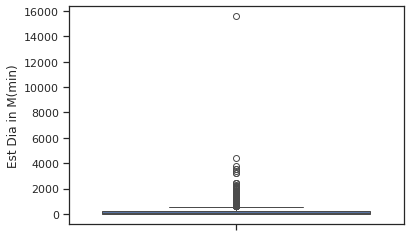

Est Dia in M(max)


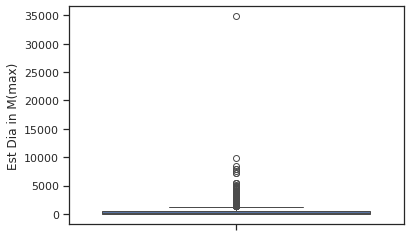

Est Dia in Miles(min)


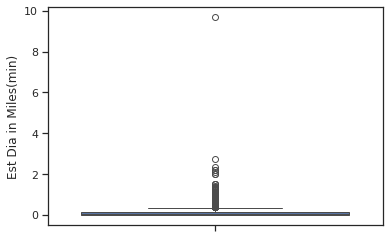

Est Dia in Miles(max)


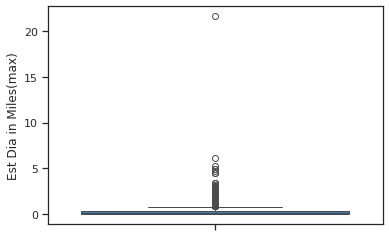

Est Dia in Feet(min)


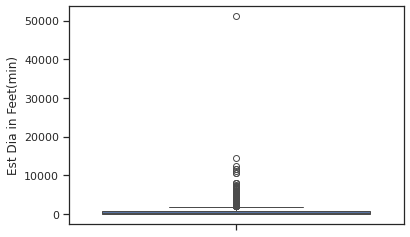

Est Dia in Feet(max)


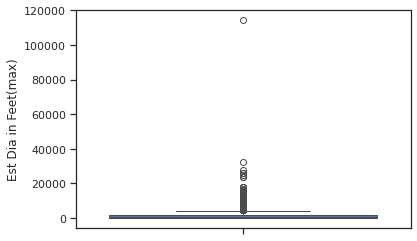

Relative Velocity km per sec


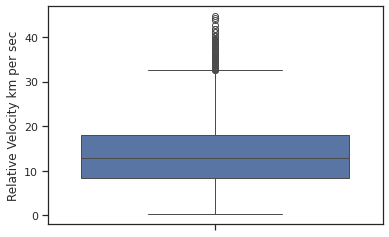

Relative Velocity km per hr


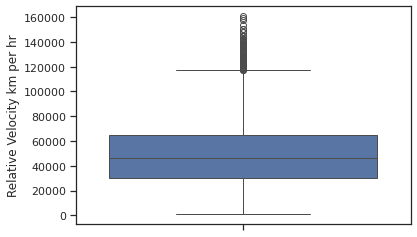

Miles per hour


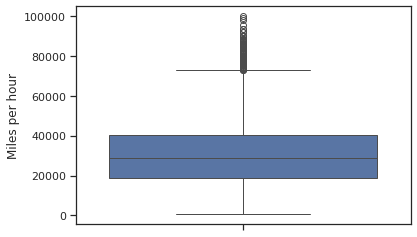

Miss Dist.(Astronomical)


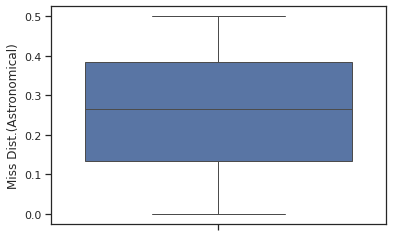

Miss Dist.(lunar)


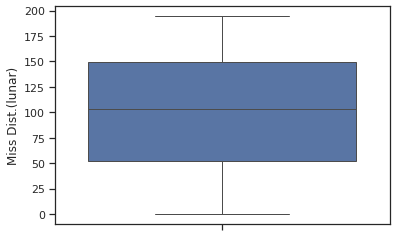

Miss Dist.(kilometers)


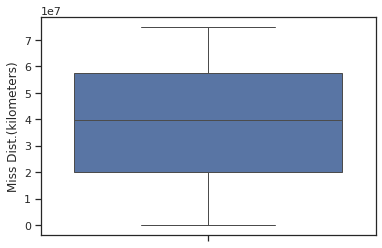

Miss Dist.(miles)


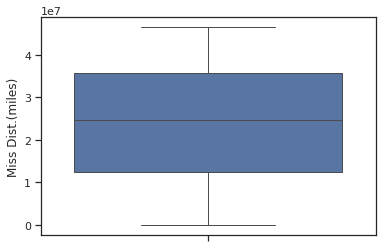

Orbit Uncertainity


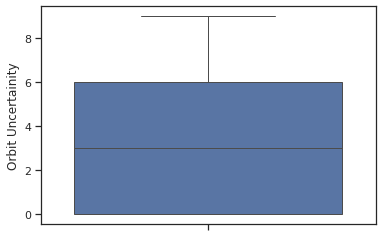

Minimum Orbit Intersection


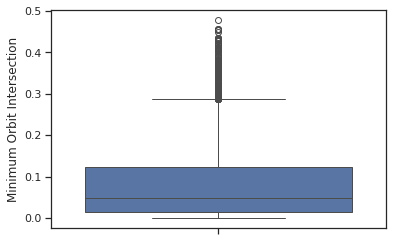

Jupiter Tisserand Invariant


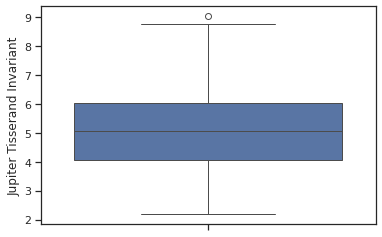

Epoch Osculation


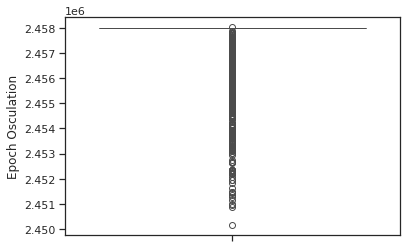

Eccentricity


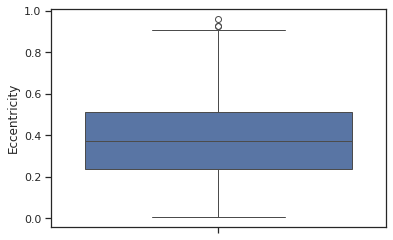

Semi Major Axis


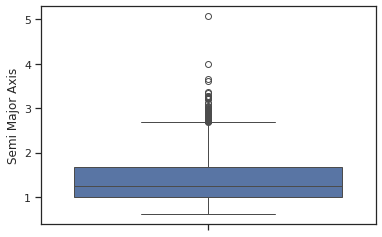

Inclination


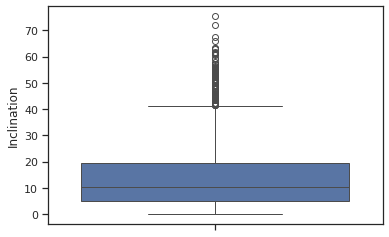

Asc Node Longitude


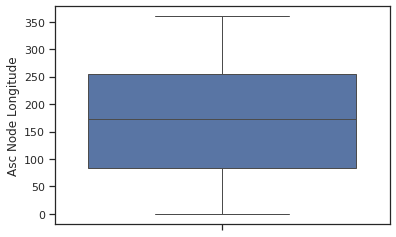

Orbital Period


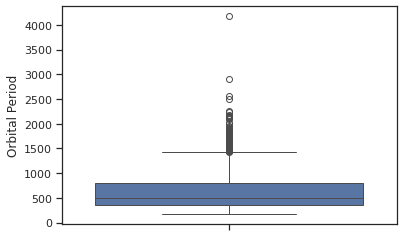

Perihelion Distance


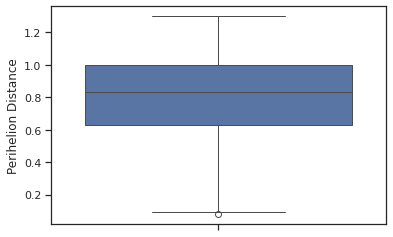

Perihelion Arg


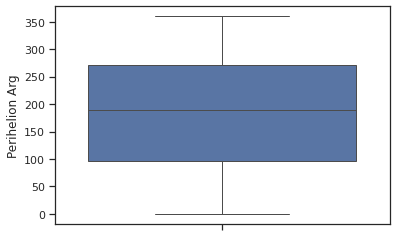

Aphelion Dist


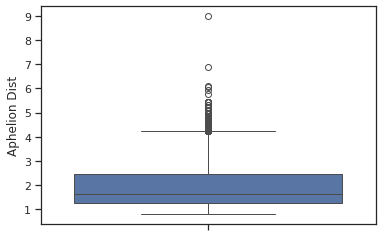

Perihelion Time


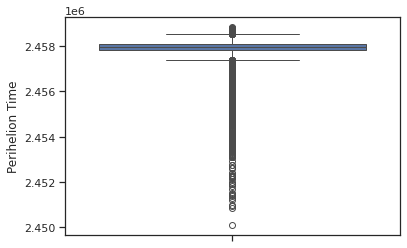

Mean Anomaly


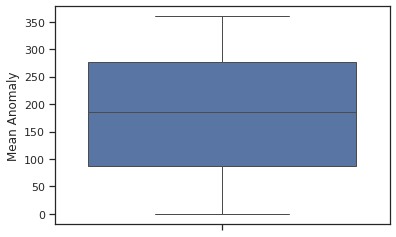

Mean Motion


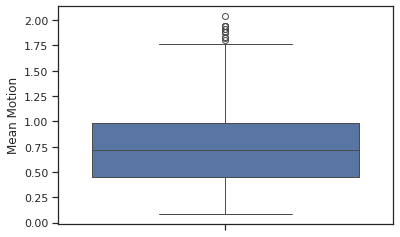

In [40]:
quant_vars = df.select_dtypes(['int64','float64'])

sns.set(style = "ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(data = quant_vars, y = var)
    plt.show()

Absolute Magnitude


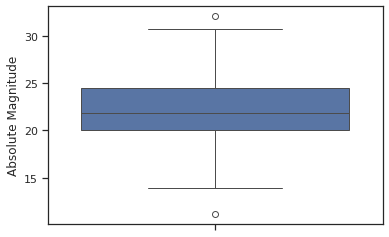

Relative Velocity km per sec


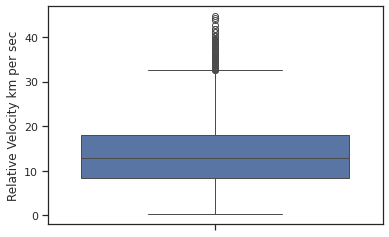

Relative Velocity km per hr


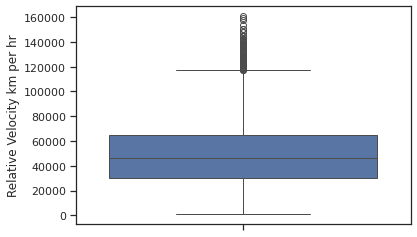

Miles per hour


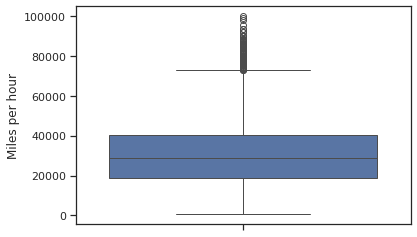

Orbit Uncertainity


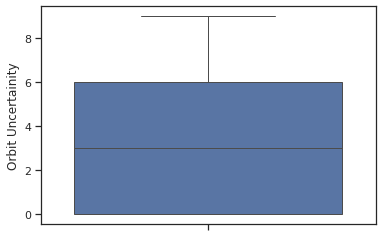

Minimum Orbit Intersection


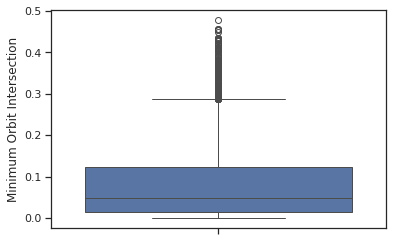

Jupiter Tisserand Invariant


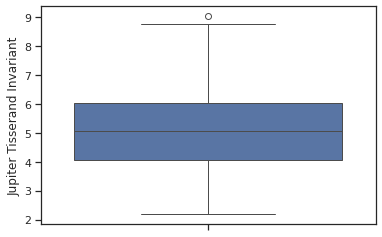

Epoch Osculation


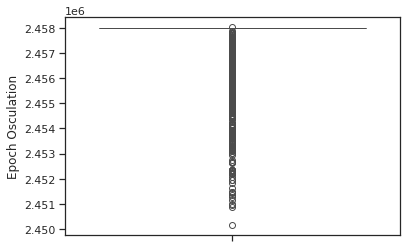

Eccentricity


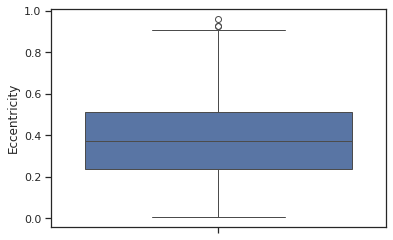

Semi Major Axis


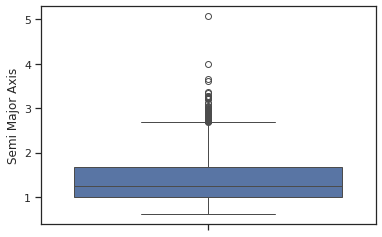

Inclination


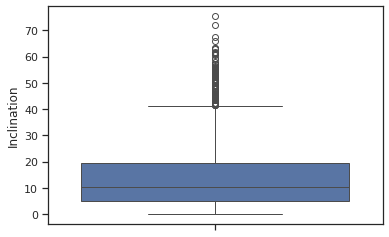

Asc Node Longitude


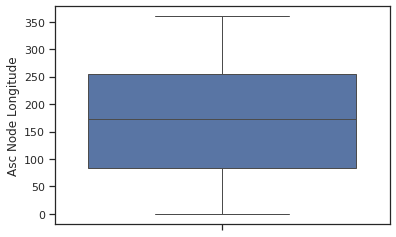

Orbital Period


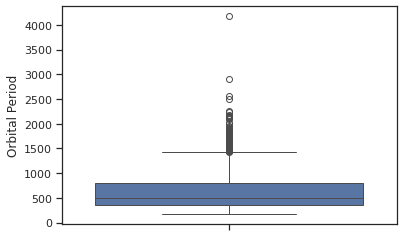

Perihelion Distance


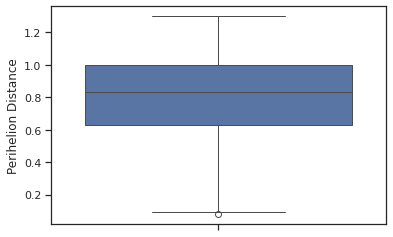

Perihelion Arg


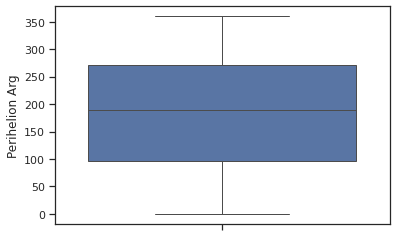

Aphelion Dist


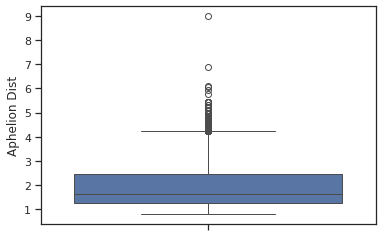

Perihelion Time


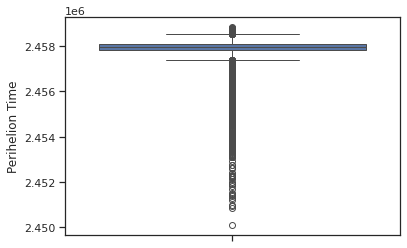

Mean Anomaly


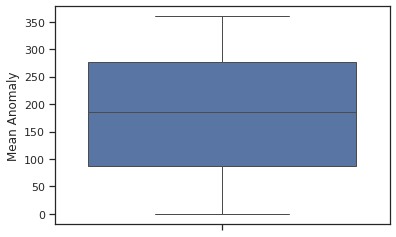

Mean Motion


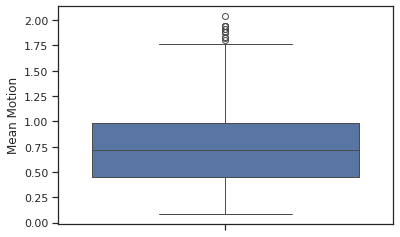

In [41]:
quant_vars = df_miss.select_dtypes(['int64','float64'])

sns.set(style = "ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(data = quant_vars, y = var)
    plt.show()

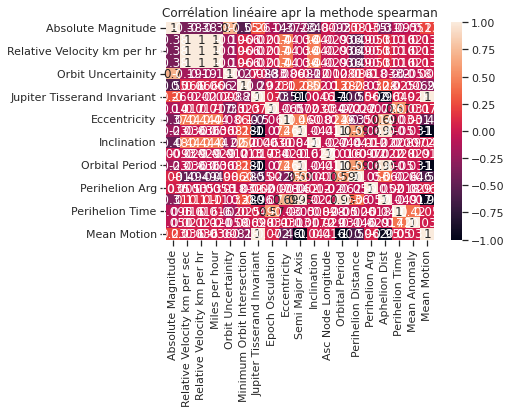

In [42]:
#corrélation de spearman
df_corr = df_miss.corr(method='spearman')
sns.heatmap(df_corr, annot=True)
plt.title("Corrélation linéaire apr la methode spearman")
plt.show()

In [48]:
df = df.drop(['Est Dia in KM(min)',
'Est Dia in KM(max)',
'Est Dia in M(min)',
'Est Dia in M(max)',
'Est Dia in Miles(min)',
'Est Dia in Miles(max)',
'Est Dia in Feet(max)',
'Miles per hour',
'Miss Dist.(Astronomical)',
'Miss Dist.(lunar)',
'Miss Dist.(kilometers)',
'Miss Dist.(miles)'], axis = 1)
df.describe()

,Absolute Magnitude,Est Dia in Feet(min),Relative Velocity km per sec,Relative Velocity km per hr,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,671.273653,13.970811,50294.919829,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,1212.511199,7.293223,26255.601377,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,3.315431,0.335504,1207.814804,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,109.784247,8.432865,30358.313370,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,363.529809,12.917889,46504.401181,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,832.798679,18.077649,65079.535405,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,51114.018738,44.633747,160681.487851,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


# Normalisation

In [55]:
X = df.drop([True], axis = 1)
X.columns = X.columns.astype(str)
y = df[True].astype(int)
print(X.shape)
print(y.shape)

(4687, 20)
(4687,)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(4687, 20)


#  ACP

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

    # Interpretation

In [64]:
valeurs_propres = pca.explained_variance_
variance_expliquée = np.round(pca.explained_variance_ratio_ *100)
variance_expliquée_cumulée = np.round(np.cumsum(pca.explained_variance_ratio_)*100)

PCA = pd.DataFrame({'valeurs propres':valeurs_propres,
                    'variance expliquée':variance_expliquée, 
                    'variance expliquée cumulée':variance_expliquée_cumulée})
PCA

,valeurs propres,variance expliquée,variance expliquée cumulée
0,5.538718,28.0,28.0
1,3.697120,18.0,46.0
2,2.306632,12.0,58.0
3,1.678568,8.0,66.0
4,1.328720,7.0,73.0


# Model Building

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, validation_curve

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(3749, 20)
(938, 20)


In [69]:
from sklearn.neighbors import KNeighborsClassifier

classif = KNeighborsClassifier(n_neighbors=5)
classif.fit(X, y)
print(classif.score(X, y)*100)


86.85726477490932


In [70]:
classif.get_metadata_routing

<bound method _MetadataRequester.get_metadata_routing of KNeighborsClassifier()>

In [71]:
classif.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier()>

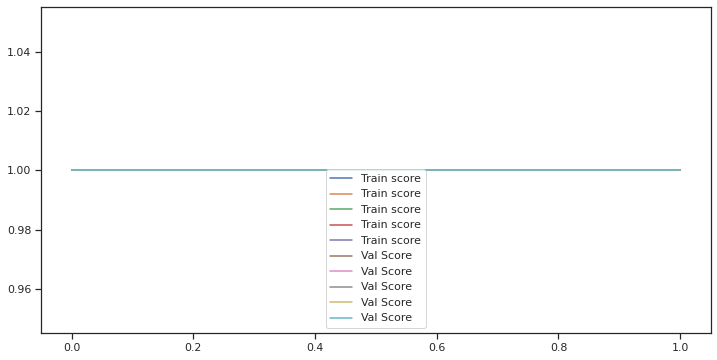

In [76]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
N, train_score, val_score = learning_curve(tree, X_train, y_train, train_sizes=[0.3, 0.6])
plt.figure(figsize=(12, 6))
plt.plot(train_score, label = 'Train score')
plt.plot(val_score, label = 'Val Score')
plt.legend()
plt.show()

In [80]:
#score 
print("le score du modele apres entrainement est:", tree.score(X_test, y_test)*100, '%')

le score du modele apres entrainement est: 100.0 %


In [81]:
tree.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1.])

In [84]:
tree.max_features_

20

[Text(0.5, 0.75, 'x[19] <= -0.922\ngini = 0.272\nsamples = 3749\nvalue = [3139, 610]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 610\nvalue = [0, 610]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3139\nvalue = [3139, 0]')]

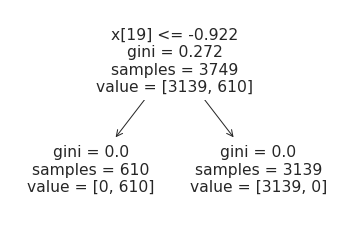

In [85]:
plot_tree(tree)

In [90]:
rand = RandomForestClassifier(n_estimators=200, min_samples_split=2, random_state=42)
rand.fit(X_train, y_train)
print("le score du modele:", rand.score(X_test, y_test)*100, '%')

le score du modele: 100.0 %


In [91]:
rand.estimator_

DecisionTreeClassifier()

In [92]:
rand.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha',
 'monotonic_cst')

In [93]:
rand.n_features_in_

20

In [96]:
parameters  = {'max_depth':np.arange(5)}
grid = GridSearchCV(rand.estimator_, param_grid=parameters, scoring='f1', 
                   cv = 5,verbose=0)

print(grid.fit(X_train, y_train))
print("le score", grid.score(X_test, y_test))

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([0, 1, 2, 3, 4])}, scoring='f1')
le score 1.0


/home/einstein/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/einstein/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/einstein/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/einstein/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/einstei

In [97]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [98]:
grid.best_score_

1.0

In [99]:
grid.best_params_

{'max_depth': 1}

In [103]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])